# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the data
liquor_store = pd.read_csv('../data/liquor_store_sales.csv')
liquor_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


In [3]:
data = liquor_store.copy()
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<AxesSubplot:xlabel='ItemType'>

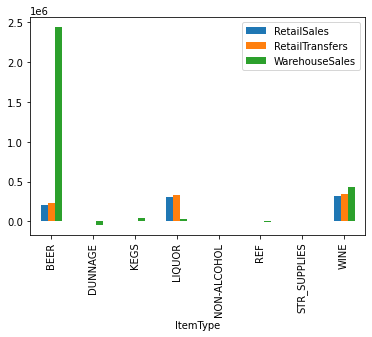

In [3]:
liq_sales = liquor_store[['RetailSales', 'RetailTransfers', 'WarehouseSales','ItemType']].groupby(['ItemType']).agg("sum")
liq_sales.plot.bar()

In [10]:
#paolo: yes, you could add figuresize also to make the plot a bit bigger

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

Text(0.5, 1.0, 'Top 10 Suppliers')

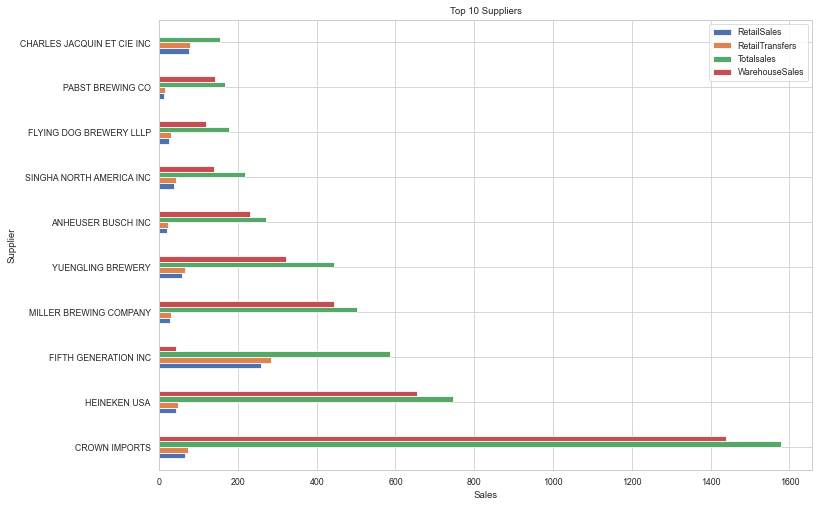

In [4]:
#Compute total sales 
liquor_store['Totalsales']=liquor_store['RetailSales']+liquor_store['RetailTransfers']+liquor_store['WarehouseSales']

#plotting style specs
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style = 'whitegrid',context = 'paper')

#draw the plot 
pd.pivot_table(liquor_store,columns = 'Supplier',values = ['RetailSales','RetailTransfers','WarehouseSales','Totalsales']).transpose().sort_values('Totalsales',ascending=False).head(10).plot(kind = 'barh')
plt.xlabel("Sales")
plt.title("Top 10 Suppliers")


## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

Text(0.5, 1.0, 'Monthly Average Sales')

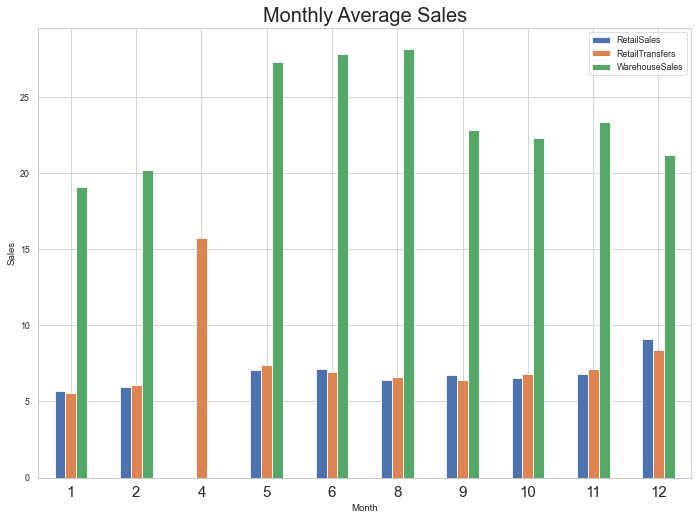

In [5]:
liquor_store.pivot_table(values=['RetailSales','RetailTransfers','WarehouseSales'],columns=['Month']).transpose().plot(kind = 'bar')

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel("Month")
plt.xticks(rotation = 360 , size = 15)
plt.ylabel("Sales")
plt.title("Monthly Average Sales",fontsize = 20)


## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

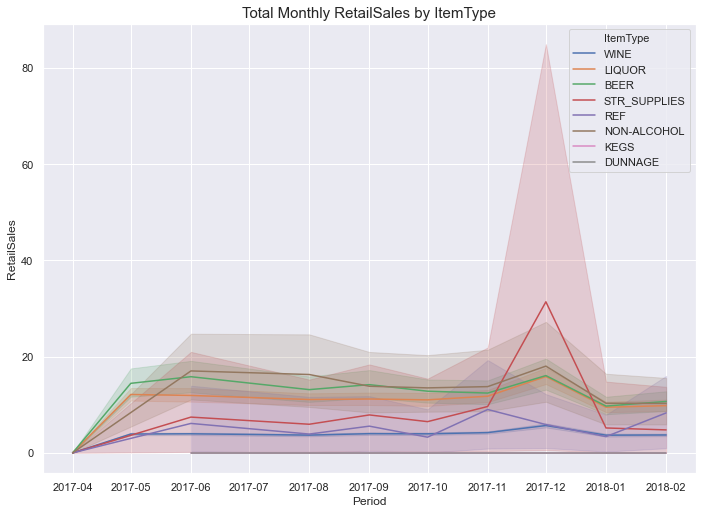

In [6]:
from datetime import date
liquor_store['Period'] = pd.to_datetime(liquor_store[['Year','Month']].assign(Day = 1))
liquor_store.pivot_table(index = 'ItemType',values='RetailSales',aggfunc={'RetailSales':'sum'})
sales_plot = sns.lineplot(x = 'Period', y = 'RetailSales',hue = 'ItemType',data = liquor_store).set_title("Total Monthly RetailSales by ItemType", fontsize = 15)
plt.show()

In [ ]:
#paolo: yes, can you please check the y- values? They look too small,should be
# in the thousads, see also your following plot where the y is in the
# thousands

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

Text(0.5, 1.0, 'Total Monthly RetailSales by ItemType')

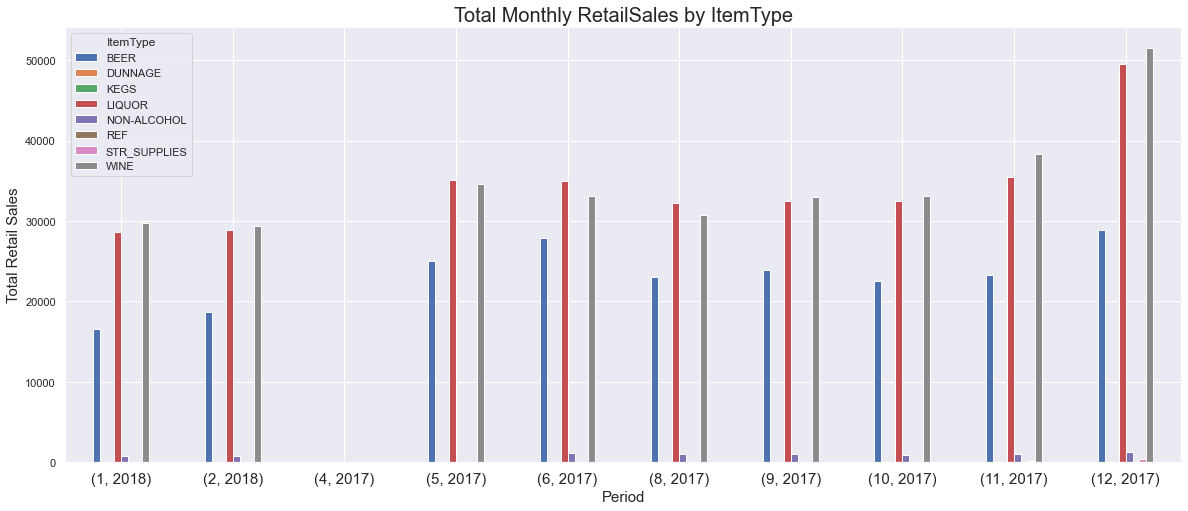

In [7]:
plt.rcParams['figure.figsize']=(15,6)
liquor_store.pivot_table(index = 'ItemType',values='RetailSales',columns = ['Month','Year'],aggfunc={'RetailSales':'sum'}).transpose().plot.bar(figsize = (20,8))
plt.xlabel("Period",fontsize = 15)
plt.xticks(rotation = 360 , fontsize =15)
plt.ylabel("Total Retail Sales",fontsize = 15)
plt.title("Total Monthly RetailSales by ItemType",fontsize=20)
#paolo: better if you could move the data from 2018 after the data from 2017 in the plot

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

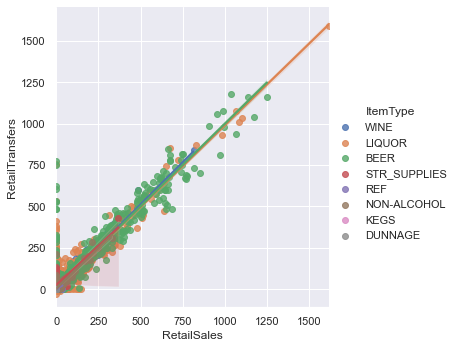

In [8]:
sns.lmplot(data = liquor_store ,x = 'RetailSales',y = 'RetailTransfers',hue = 'ItemType')

In [11]:
#paolo: yes!

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

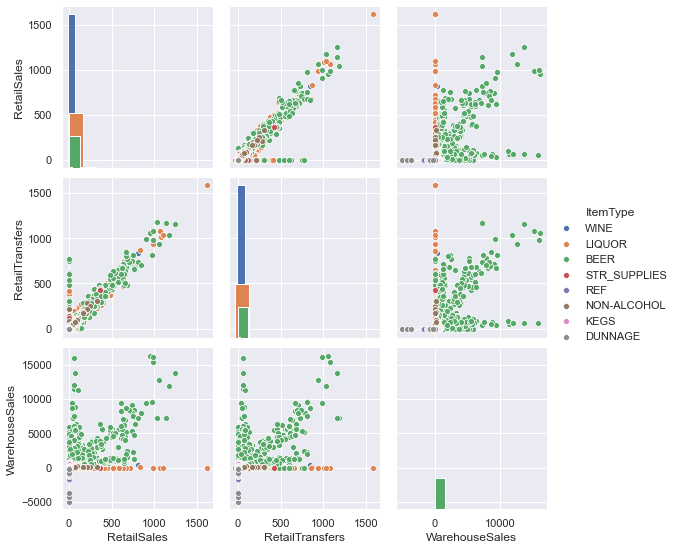

In [9]:
numeric_data = liquor_store[['ItemType','RetailSales','RetailTransfers','WarehouseSales']]
sns.pairplot(numeric_data,hue = 'ItemType',diag_kind="hist")


In [13]:
#paolo feedback- yes good lab! check out comments above